# Sentimen Analysis - Jatim Camp 3 - 29 September 2018

## Overview
 > Intro to sentiment <br>
 > Intro to python programming<br>
 > Intro to text analysis<br>
 > Preprocessing text<br>
 > Feature Selection<br>
 > Classification<br>
 > Visualize (more deep analysis)<br>

 - ### 1. Intro to Sentiment

>Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text. Sentiment is often framed as a binary distinction (positive vs. negative), but it can also be a more fine-grained, like identifying the specific emotion an author is expressing (like fear, joy or anger).

>Sentiment analysis is used for many applications, especially in business intelligence. Some examples of applications for sentiment analysis include:

>Analyzing the social media discussion around a certain topic
Evaluating survey responses
Determining whether product reviews are positive or negative
Sentiment analysis is not perfect, and as with any automatic analysis of language, you will have errors in your results. It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze all of it.

- #### How it work ?

There are many ways to do sentiment analysis (if you're interested, you can see many of them here). Many approches use the same general idea, however 
 - Create or find a list of words associated with strongly positive or negative sentiment.
 - Count the number of positive and negative words in the text.
 - Analyze the mix of positive to negative words. Many positive words and few negative words indicates positive sentiment, while many negative words and few positive words indicates negative sentiment. <br>

The first step, creating or finding a word list (also called a lexicon), is generally the most time-consuming. While you can often use a lexicon that already exists, if your text is discussing a specific topic you may need to add to or modify it.

> "Sick" is an example of a word that can have positive or negative sentiment depending on what it's used to refer to. If you're discussing a pet store that sells a lot of sick animals, the sentiment is probably negative. On the other hand, if you're talking about a skateboarding instructor who taught you how to do a lot of sick flips, the sentiment is probably very positive.

 - ### 2. Intro to python programming

 - ### 3. Intro to text analysis

<img src="data/harry.jpg" />
>Apa yang ingin kita ketahui ketika kita sedang membaca sebuah cerita ? <br>
>Apa yang bisa dilakukan komputer dalam analisis text ? <br>

- First, we want to know the overall length of the story, and we want to know some basic information like how many words, sentences, and paragraphs are used to tell the story, or make the argument in the case of essays. (This kind of information is useful for later mapping our the overall shape and structure of a text.) <br>
- Second, we want to know how many of the words in the word count are actually unique, what those words are, and which words get used the most often and which the least. (This establishes the vocabulary used, points to any particular registers, and begins to reveal the interaction between words and meaning.) <br>
- Third, using the word frequency distribution, the fancier term for counting individual words, we want to visualize the text both as a graph and as a word cloud. In doing so, we can begin to “see” for ourselves which words matter and which words don’t matter. (This introduces the idea of function words in the form of a word stop list.) <br>
- Fourth, we want to use our new-found insight into word usage to examine particular instances: we want to see words in context and we want to see what words mean within the context of a particular text. (This highlights the role of context and offers a companion to meaning to be found simply in the words used.)

 - ### 4. Preprocessing text

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('nambahdata/british.csv', delimiter=';')

In [3]:
df.head(5)

,airlines,date_post,text,sentiment
0,british-airways,2018-09-12,| London Heathrow to Dubai. This was the fir...,POSITIVE
1,british-airways,2018-09-11,| Heraklion to Gatwick. Left my luggage behi...,NEGATIVE
2,british-airways,2018-09-10,| Flew Madrid to London Heathrow. The 767 is ...,POSITIVE
3,british-airways,2018-09-10,| London Heathrow to Brindisi. We weren’t ex...,NEGATIVE
4,british-airways,2018-09-08,| I have BA silver membership. This promises ...,NEGATIVE


In [4]:
df.shape

(2610, 4)

In [5]:
df['sentiment'].value_counts()

NEGATIVE    1439
POSITIVE    1171
Name: sentiment, dtype: int64

 - menghapus karakter yang tidak penting

In [6]:
df['text'] = df['text'].map(lambda x: x.lstrip(' | '))

In [7]:
df.head(5)

,airlines,date_post,text,sentiment
0,british-airways,2018-09-12,London Heathrow to Dubai. This was the first t...,POSITIVE
1,british-airways,2018-09-11,Heraklion to Gatwick. Left my luggage behind o...,NEGATIVE
2,british-airways,2018-09-10,Flew Madrid to London Heathrow. The 767 is anc...,POSITIVE
3,british-airways,2018-09-10,London Heathrow to Brindisi. We weren’t expect...,NEGATIVE
4,british-airways,2018-09-08,I have BA silver membership. This promises fas...,NEGATIVE


In [8]:
df['sentiment'] = df['sentiment'].replace({'POSITIVE': 1, 'NEGATIVE': 0})

In [9]:
df.head(5)

,airlines,date_post,text,sentiment
0,british-airways,2018-09-12,London Heathrow to Dubai. This was the first t...,1
1,british-airways,2018-09-11,Heraklion to Gatwick. Left my luggage behind o...,0
2,british-airways,2018-09-10,Flew Madrid to London Heathrow. The 767 is anc...,1
3,british-airways,2018-09-10,London Heathrow to Brindisi. We weren’t expect...,0
4,british-airways,2018-09-08,I have BA silver membership. This promises fas...,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['sentiment'],
                                                    random_state=0)

In [12]:
X_test.index

Int64Index([2060, 2419,  192, 2531,  913, 1101, 2228, 2365, 1543, 2266,
            ...
            1591,  963, 2514,  305, 2401,  442, 1604,  157, 1831, 2349],
           dtype='int64', length=653)

In [13]:
print(len(y_train), len(y_test))

1957 653


In [14]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 London to Bangkok. I was a bit apprehensive about flying BA Club World due to the bad reviews the airline has received recently. Boarding at Heathrow was well organised due to their group boarding policy. On board I offered a pre Champagne or water. Once airborne choose gin and tonic and cashew nuts. Meal pre ordered online. I found all three courses exceptional and very well cooked. The staff worked tireless right through the twelve hour flight. I know BA Club Seats are not ideal, but nevertheless they are still more comfortable than any Middle East airline I have flown with. Entertainment screen poor and needs urgent revamp, cannot see when lights are on in the cabin. Very nice to see a mixed aged crew that shows ageism does not exist at BA. I also must commend BA for their quick medical response to a passenger who had collapsed on the aircraft in club. There rapid response and actions probably saved his life, I flew on 12 January. Well done BA, you are pulling

 - ### 5. Feature Selection : TF-IDF

TFIDF Vectorizer
TF-IDF is another way to convert textual data to a numeric form and is short for Term Frequency-Inverse Document Frequency. The vector value it yields is the product of these two terms; TF and IDF. <br>
Let's first look at Term Frequency. We have already looked at term frequency above with count vectorizer, but this time, we need one more step to calculate the relative frequency. Let's say we have two documents in total as below. <br>
1. I love dogs <br>
2. I hate dogs and knitting <br> <br>
Relative term frequency is calculated for each term within each document as below. <br> <br>
$${TF(t,d)} = \frac {number\ of\ times\ term(t)\ appears\ in\ document(d)}{total\ number\ of\ terms\ in\ document(d)}$$<br>
For example, if we calculate relative term frequency for 'I' in both document 1 and document 2, it will be as below.<br><br>
$${TF('I',d1)} = \frac {1}{3} \approx {0.33}$$$${TF('I',d2)} = \frac {1}{5} = {0.2}$$
Next, we need to get Inverse Document Frequency, which measures how important a word is to differentiate each document by following the calculation as below. <br><br>
$${IDF(t,D)} = \log \Big(\frac {total\ number\ of\ documents(D)}{number\ of\ documents\ with\ the\ term(t)\ in\ it}\Big)$$ <br>
If we calculate inverse document frequency for 'I', <br>
$${IDF('I',D)} = \log \Big(\frac {2}{2}\Big) = {0}$$
<br>Once we have the values for TF and IDF, now we can calculate TFIDF as below. <br><br>
$${TFIDF(t,d,D)} = {TF(t,d)}\cdot{IDF(t,D)}$$
<br>Following the case of our example, TFIDF for term 'I' in both documents will be as below. <br><br>
$${TFIDF('I',d1,D)} = {TF('I',d1)}\cdot{IDF('I',D)} = {0.33}\times{0} = {0}$$$${TFIDF('I',d2,D)} = {TF('I',d2)}\cdot{IDF('I',D)} = {0.2}\times{0} = {0}$$
<br>As you can see, the term 'I' appeared equally in both documents, and the TFIDF score is 0, which means the term is not really informative in differentiating documents. The rest is same as count vectorizer, TFIDF vectorizer will calculate these scores for terms in documents, and convert textual data into a numeric form.

In [15]:
vect = TfidfVectorizer(min_df=5, stop_words='english', use_idf=True, ngram_range=(1,2)).fit(X_train)
len(vect.get_feature_names())

6127

In [16]:
X_train_vectorized = vect.transform(X_train)

 - ### 6. Classification

> NAIVE BAYES

In [17]:
mnb = MultinomialNB()

mnb.fit(X_train_vectorized, y_train)

predictions = mnb.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))
print('Confusion Metrix: ', confusion_matrix(y_test,predictions))
print('ACC: ', accuracy_score(y_test, predictions))

AUC:  0.845942358741
Confusion Metrix:  [[340  20]
 [ 74 219]]
ACC:  0.856049004594


In [18]:
confusion_matrix?

In [19]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['fast drinks' 'minutes prior' 'went check' 'check gate'
 'oneworld sapphire' 'enquired' 'distant' 'priority tags' 'new slim'
 'featured new']

Largest tfidf: 
['suitcase' 'moscow' 'luggage' 'carry' '00' 'child' 'mother' 'pisa'
 'montreal' 'update']


In [20]:
sorted_coef_index = mnb.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['incorrect' 'airlines british' 'tomorrow' 'seat did' 'seat business'
 'seat broken' 'don waste' 'hugely' 'airline flying' 'don care']

Largest Coefs: 
['flight' 'good' 'ba' 'crew' 'seat' 'lhr' 'service' 'food' 'time' 'cabin']


In [22]:
print(mnb.predict(vect.transform(['not good, the snack is too expensive',
                                    'very bad, the service suck'])))

[1 0]


 - ### 7. Visualize

In [23]:
indices = X_test.index
print(indices)

Int64Index([2060, 2419,  192, 2531,  913, 1101, 2228, 2365, 1543, 2266,
            ...
            1591,  963, 2514,  305, 2401,  442, 1604,  157, 1831, 2349],
           dtype='int64', length=653)


In [24]:
type(predictions)

numpy.ndarray

In [25]:
my_df = df.iloc[indices]

In [27]:
my_df.tail(2)

,airlines,date_post,text,sentiment
1831,british-airways,2015-06-12,"10/6/15, LHR-GLA, A321, Seat 9A. Was able to ...",1
2349,british-airways,2014-09-09,LHR-MCT-LHR. Excellent outbound flight. Tasty ...,0


In [28]:
my_df['sentiment'] = predictions

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
train_pos = my_df[my_df['sentiment'] == 1]
train_pos = train_pos['text']
train_neg = my_df[my_df['sentiment'] == 0]
train_neg = train_neg['text']

Positive words cloud


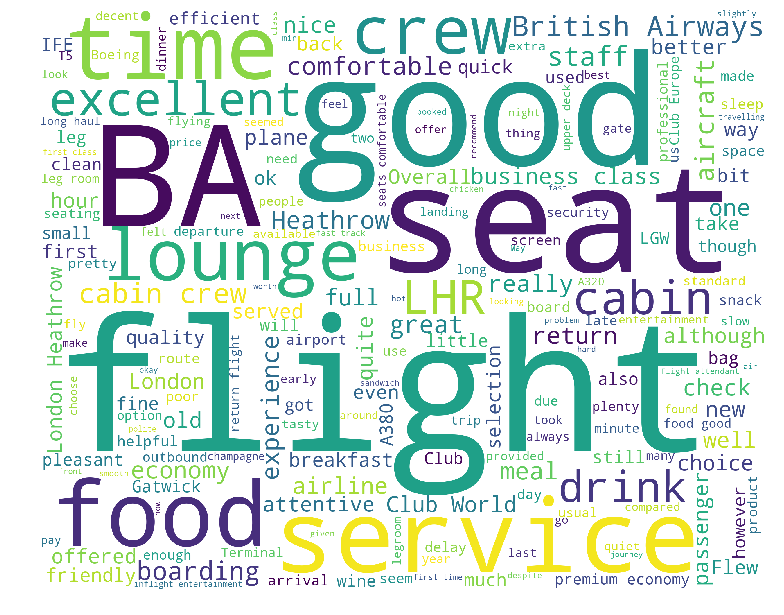

Negative words cloud


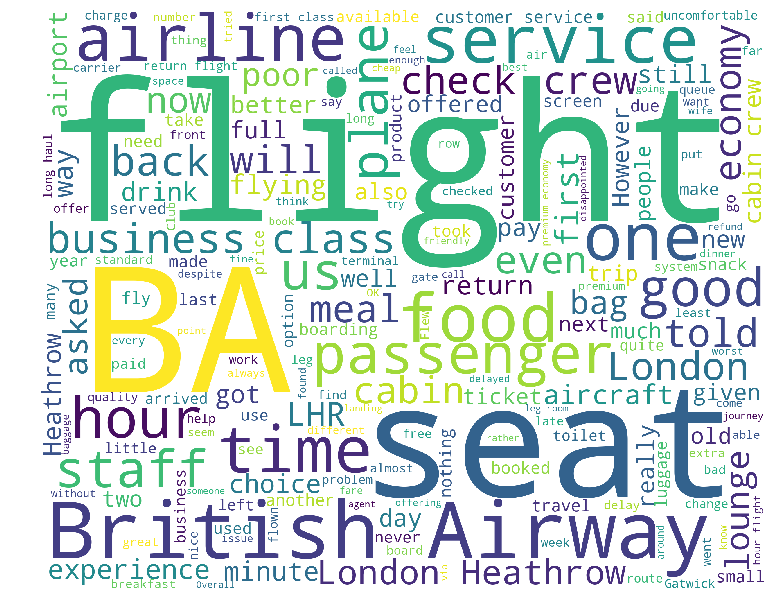

In [30]:
def draw_wordcloud(data, color = 'black'):
    words=' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color=color,
                         width=2500,
                         height=2000
                         ).generate(cleaned_word)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print('Positive words cloud')
draw_wordcloud(train_pos, 'white')
print('Negative words cloud')
draw_wordcloud(train_neg, 'white')

In [31]:
train_neg_2 = my_df[my_df['sentiment'] == 0]
train_neg_2 = train_neg_2[train_neg_2['text'].str.contains('customer service')]
train_neg_2 = train_neg_2['text']

Negative words cloud about customer service


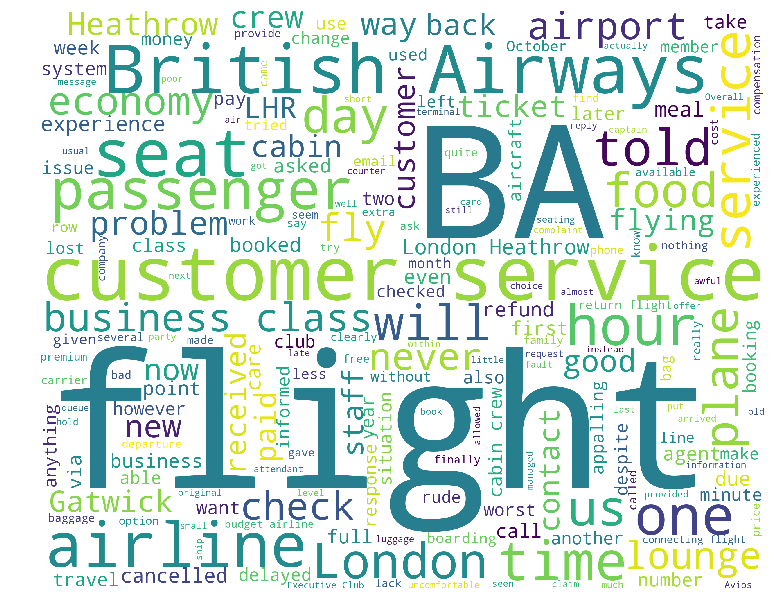

In [32]:
print('Negative words cloud about customer service')
draw_wordcloud(train_neg_2, 'white')